In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Delaware Department of Elections (https://elections.delaware.gov/archive/elect18/elect18_general/html/index.shtml)
Precinct shapefile from State of Delaware FirstMap GIS (http://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries)

Precincts 17-02, 16-31, and 16-41 are the reporting units for UOCAVA votes from New Castle, Kent, and Sussex Counties, respectively. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

Precincts 02-09/10-09, 05-09/11-09, 08-09/12-09/13-09 were split in the shapefile to reflect changes made prior to the 2018 election.

- G18USSDCAR - Thomas R. Carper (Democratic Party)
- G18USSRARL - Robert B. Arlett (Republican Party)
- G18USSGTHE - Emitri G. Theodoropoulos (Green Party)
- G18USSLFRO - Nadine M. Frost (Libertarian Party)


- G18HALDROC - Lisa Blunt Rochester (Democratic Party)
- G18HALRWAL - Scott Walker (Republican Party)


- G18ATGDJEN - Kathleen Jennings (Democratic Party)
- G18ATGRPEP - Bernard V. Pepukayi, Sr. (Republican Party)


- G18TREDDAV - Colleen Davis (Democratic Party)
- G18TRERSIM - Kenneth A. Simpler (Republican Party)
- G18TREGCHA - David B. Chandler (Green Party)


- G18AUDDMCG - Kathleen K. McGuiness (Democratic Party)
- G18AUDRSPA - James Spadola (Republican Party)


## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/de_2018/de_2018.shp")

In [3]:
vest_shp.shape

(434, 15)

In [4]:
vest_shp.head(1)

,PRECINCT,G18USSDCAR,G18USSRARL,G18USSGTHE,G18USSLFRO,G18HALDROC,G18HALRWAL,G18ATGDJEN,G18ATGRPEP,G18TREDDAV,G18TRERSIM,G18TREGCHA,G18AUDDMCG,G18AUDRSPA,geometry
0,01-21,353,170,2,3,349,165,337,178,271,246,5,290,229,"POLYGON ((-8424454.124 4829097.736, -8424475.4..."


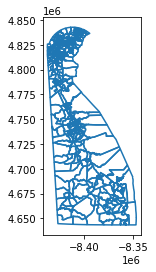

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load 5 Files

The SOS directed us to this link for election results for the 2018 general: https://elections.delaware.gov/archive/elect18/elect18_general/html/stwres.shtml

We copy-pasted each election section to separate csv files and load them individually below. 

In [6]:
uss_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - uss_g18.csv', 
                         names = ['Office','District','Total',
                                  'G18USSDCAR_mc','G18USSDCAR_abs','G18USSDCAR',
                                  'G18USSRARL_mc','G18USSRARL_abs','G18USSRARL',
                                  'G18USSGTHE_mc','G18USSGTHE_abs','G18USSGTHE',
                                  'G18USSLFRO_mc','G18USSLFRO_abs','G18USSLFRO'])
uss_results = uss_results[(uss_results.Office == 'UNITED STATES SENATOR') & (uss_results.District.str.contains('-'))]
uss_results.head()

,Office,District,Total,G18USSDCAR_mc,G18USSDCAR_abs,G18USSDCAR,G18USSRARL_mc,G18USSRARL_abs,G18USSRARL,G18USSGTHE_mc,G18USSGTHE_abs,G18USSGTHE,G18USSLFRO_mc,G18USSLFRO_abs,G18USSLFRO
3,UNITED STATES SENATOR,01-01,643,552,29,581,50,1,51,5,0,5,4,2,6
4,UNITED STATES SENATOR,02-01,"1,000",903,34,937,36,0,36,22,0,22,5,0,5
5,UNITED STATES SENATOR,03-01,573,520,21,541,19,1,20,8,0,8,4,0,4
6,UNITED STATES SENATOR,04-01,818,748,19,767,30,1,31,12,0,12,8,0,8
7,UNITED STATES SENATOR,05-01,"1,008",830,30,860,106,5,111,23,0,23,13,1,14


In [7]:
hal_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - hal_g18.csv',
                         names = ['Office','District','Total',
                                  'G18HALDROC_mc','G18HALDROC_abs','G18HALDROC',
                                  'G18HALRWAL_mc','G18HALRWAL_abs','G18HALRWAL'])
hal_results = hal_results[(hal_results.Office == 'REPRESENTATIVE IN CONGRESS') & (hal_results.District.str.contains('-'))]
hal_results.head()

,Office,District,Total,G18HALDROC_mc,G18HALDROC_abs,G18HALDROC,G18HALRWAL_mc,G18HALRWAL_abs,G18HALRWAL
3,REPRESENTATIVE IN CONGRESS,01-01,636,564,30,594,41,1,42
4,REPRESENTATIVE IN CONGRESS,02-01,"1,007",945,34,979,28,0,28
5,REPRESENTATIVE IN CONGRESS,03-01,573,533,23,556,15,2,17
6,REPRESENTATIVE IN CONGRESS,04-01,811,766,18,784,26,1,27
7,REPRESENTATIVE IN CONGRESS,05-01,997,868,29,897,95,5,100


In [8]:
tre_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - tre_g18.csv',
                         names = ['Office','District','Total',
                                  'G18TREDDAV_mc','G18TREDDAV_abs','G18TREDDAV',
                                  'G18TRERSIM_mc','G18TRERSIM_abs','G18TRERSIM',
                                  'G18TREGCHA_mc','G18TREGCHA_abs','G18TREGCHA'])
tre_results = tre_results[(tre_results.Office == 'STATE TREASURER') & (tre_results.District.str.contains('-'))]
tre_results.head()

,Office,District,Total,G18TREDDAV_mc,G18TREDDAV_abs,G18TREDDAV,G18TRERSIM_mc,G18TRERSIM_abs,G18TRERSIM,G18TREGCHA_mc,G18TREGCHA_abs,G18TREGCHA
3,STATE TREASURER,01-01,626,491,26,517,96,4,100,9,0,9
4,STATE TREASURER,02-01,978,879,30,909,49,2,51,18,0,18
5,STATE TREASURER,03-01,569,514,23,537,16,2,18,14,0,14
6,STATE TREASURER,04-01,784,693,17,710,55,2,57,17,0,17
7,STATE TREASURER,05-01,982,717,23,740,201,11,212,29,1,30


In [9]:
aud_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - aud_g18.csv',
                         names = ['Office','District','Total',
                                  'G18AUDDMCG_mc','G18AUDDMCG_abs','G18AUDDMCG',
                                  'G18AUDRSPA_mc','G18AUDRSPA_abs','G18AUDRSPA'])
aud_results = aud_results[(aud_results.Office == 'AUDITOR OF ACCOUNTS') & (aud_results.District.str.contains('-'))]
aud_results.head()

,Office,District,Total,G18AUDDMCG_mc,G18AUDDMCG_abs,G18AUDDMCG,G18AUDRSPA_mc,G18AUDRSPA_abs,G18AUDRSPA
3,AUDITOR OF ACCOUNTS,01-01,626,502,24,526,95,5,100
4,AUDITOR OF ACCOUNTS,02-01,969,887,31,918,49,2,51
5,AUDITOR OF ACCOUNTS,03-01,552,509,22,531,19,2,21
6,AUDITOR OF ACCOUNTS,04-01,796,721,19,740,55,1,56
7,AUDITOR OF ACCOUNTS,05-01,987,701,24,725,248,14,262


In [10]:
atg_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - atg_g18.csv',
                         names = ['Office','District','Total',
                                  'G18ATGDJEN_mc','G18ATGDJEN_abs','G18ATGDJEN',
                                  'G18ATGRPEP_mc','G18ATGRPEP_abs','G18ATGRPEP'])
atg_results = atg_results[(atg_results.Office == 'ATTORNEY GENERAL') & (atg_results.District.str.contains('-'))]
atg_results.head()

,Office,District,Total,G18ATGDJEN_mc,G18ATGDJEN_abs,G18ATGDJEN,G18ATGRPEP_mc,G18ATGRPEP_abs,G18ATGRPEP
3,ATTORNEY GENERAL,01-01,640,486,29,515,121,4,125
4,ATTORNEY GENERAL,02-01,996,811,25,836,152,8,160
5,ATTORNEY GENERAL,03-01,561,458,20,478,81,2,83
6,ATTORNEY GENERAL,04-01,803,684,19,703,99,1,100
7,ATTORNEY GENERAL,05-01,989,786,27,813,166,10,176


## Merge 5 Files

In [11]:
election_results = uss_results.merge(hal_results, how = 'outer', on = 'District').merge(tre_results, 
                                                  how = 'outer', on = 'District').merge(aud_results, 
                                                  how = 'outer', on = 'District').merge(atg_results, 
                                                  how = 'outer', on = 'District')

In [12]:
cols = {x: 'float' for x in election_results.columns if 'G18' in x}
election_results = election_results.replace(',','', regex=True)
election_results = election_results.astype(cols)

# Validating Election Results

## Race Totals

In [13]:
vest_shp.columns

Index(['PRECINCT', 'G18USSDCAR', 'G18USSRARL', 'G18USSGTHE', 'G18USSLFRO',
       'G18HALDROC', 'G18HALRWAL', 'G18ATGDJEN', 'G18ATGRPEP', 'G18TREDDAV',
       'G18TRERSIM', 'G18TREGCHA', 'G18AUDDMCG', 'G18AUDRSPA', 'geometry'],
      dtype='object')

In [14]:
data_columns = ['G18USSDCAR', 'G18USSRARL', 'G18USSGTHE', 'G18USSLFRO',
       'G18HALDROC', 'G18HALRWAL', 'G18ATGDJEN', 'G18ATGRPEP', 'G18TREDDAV',
       'G18TRERSIM', 'G18TREGCHA', 'G18AUDDMCG', 'G18AUDRSPA']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- election_results[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")

Printing differences below
G18USSDCAR is equal 	VEST: 217385 	RDH: 217385.0
G18USSRARL is equal 	VEST: 137127 	RDH: 137127.0
G18USSGTHE is equal 	VEST: 4170 	RDH: 4170.0
G18USSLFRO is equal 	VEST: 3910 	RDH: 3910.0
G18HALDROC is equal 	VEST: 227353 	RDH: 227353.0
G18HALRWAL is equal 	VEST: 125384 	RDH: 125384.0
G18ATGDJEN is equal 	VEST: 218351 	RDH: 218351.0
G18ATGRPEP is equal 	VEST: 137730 	RDH: 137730.0
G18TREDDAV is equal 	VEST: 187240 	RDH: 187240.0
G18TRERSIM is equal 	VEST: 164001 	RDH: 164001.0
G18TREGCHA is equal 	VEST: 6301 	RDH: 6301.0
G18AUDDMCG is equal 	VEST: 205624 	RDH: 205624.0
G18AUDRSPA is equal 	VEST: 149481 	RDH: 149481.0

All other races are equal


## County-by-County Totals

In [15]:
vest_shp.shape

(434, 15)

In [16]:
election_results.shape

(436, 50)

In [17]:
election_results.sort_values('District').head()

,Office_x,District,Total_x,G18USSDCAR_mc,G18USSDCAR_abs,G18USSDCAR,G18USSRARL_mc,G18USSRARL_abs,G18USSRARL,G18USSGTHE_mc,...,G18AUDRSPA_abs,G18AUDRSPA,Office,Total,G18ATGDJEN_mc,G18ATGDJEN_abs,G18ATGDJEN,G18ATGRPEP_mc,G18ATGRPEP_abs,G18ATGRPEP
0,UNITED STATES SENATOR,01-01,643,552.0,29.0,581.0,50.0,1.0,51.0,5.0,...,5.0,100.0,ATTORNEY GENERAL,640,486.0,29.0,515.0,121.0,4.0,125.0
14,UNITED STATES SENATOR,01-02,741,679.0,15.0,694.0,26.0,2.0,28.0,13.0,...,1.0,36.0,ATTORNEY GENERAL,736,579.0,16.0,595.0,139.0,2.0,141.0
27,UNITED STATES SENATOR,01-03,481,425.0,5.0,430.0,26.0,0.0,26.0,10.0,...,0.0,46.0,ATTORNEY GENERAL,477,405.0,4.0,409.0,66.0,2.0,68.0
37,UNITED STATES SENATOR,01-04,1219,843.0,85.0,928.0,242.0,19.0,261.0,17.0,...,35.0,499.0,ATTORNEY GENERAL,1216,869.0,83.0,952.0,239.0,25.0,264.0
53,UNITED STATES SENATOR,01-05,1037,812.0,18.0,830.0,186.0,1.0,187.0,9.0,...,0.0,219.0,ATTORNEY GENERAL,1031,775.0,17.0,792.0,237.0,2.0,239.0


Note: New Castle is not fips code 001. The first two digits of `RD-ED` do not correspond to fips. 

In [18]:
vest_shp.sort_values('PRECINCT').head()

,PRECINCT,G18USSDCAR,G18USSRARL,G18USSGTHE,G18USSLFRO,G18HALDROC,G18HALRWAL,G18ATGDJEN,G18ATGRPEP,G18TREDDAV,G18TRERSIM,G18TREGCHA,G18AUDDMCG,G18AUDRSPA,geometry
5,01-01,582,51,5,6,595,42,515,125,517,100,9,526,100,"POLYGON ((-8407935.202 4831832.283, -8407957.0..."
6,01-02,695,28,13,6,722,25,595,141,672,34,17,679,36,"POLYGON ((-8410302.300 4827543.064, -8410298.6..."
7,01-03,430,26,10,15,451,32,409,68,425,28,15,425,46,"POLYGON ((-8411336.792 4828825.843, -8411346.1..."
8,01-04,929,261,18,12,971,223,952,264,684,500,25,703,499,"POLYGON ((-8413287.555 4832059.508, -8413275.1..."
9,01-05,831,187,9,11,849,174,792,239,777,229,22,802,219,"POLYGON ((-8420436.604 4810966.168, -8420438.1..."


We will only validate the statewide totals and not continue to validate the county totals at this time, because the SOS file and the VEST file do not break out election results by county. There are only 3 counties in Delaware. 

## Precinct-by-Precinct Votes

### Distribute UOCAVA Votes

Created the following shapefile by intersecting the 2010 Census county shapefile with the Precincts shapefile linked by VEST in GQIS, to get the precinct to county translation. 

In [19]:
precinct_county = gp.read_file('./raw-from-source/Census/de_precincts_county_intersection/de_precincts_county_intersection.shp')

In [20]:
precinct_county[['EDRD_2012','COUNTY','COUNTYFP']]

,EDRD_2012,COUNTY,COUNTYFP
0,01-21,New Castle County,003
1,01-22,New Castle County,003
2,01-23,New Castle County,003
3,01-24,New Castle County,003
4,01-25,New Castle County,003
...,...,...,...
425,08-38,Sussex County,005
426,08-40,Sussex County,005
427,08-41,Sussex County,005
428,09-20,Sussex County,005


In [21]:
election_results.shape

(436, 50)

In [22]:
election_results_county = election_results.merge(precinct_county, left_on = 'District', right_on = 'EDRD_2012', how = 'outer', indicator = True)
election_results_county.groupby('_merge').count()

,Office_x,District,Total_x,G18USSDCAR_mc,G18USSDCAR_abs,G18USSDCAR,G18USSRARL_mc,G18USSRARL_abs,G18USSRARL,G18USSGTHE_mc,...,POPULATION,DISTRICT,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,7,7,7,7,7,7,7,7,7,7,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
both,429,429,429,429,429,429,429,429,429,429,...,429,429,429,429,429,429,429,429,429,429


In [23]:
election_results_county[election_results_county['_merge'] != 'both'][['District','EDRD_2012']]

,District,EDRD_2012
26,17-02,NaN
104,10-09,NaN
105,11-09,NaN
106,12-09,NaN
107,13-09,NaN
345,16-31,NaN
435,16-41,NaN
436,NaN,13-02


These precincts are not in the online shapefile linked by VEST, but they appear in the election results file. 

In [24]:
to_dole_out_totals = pd.DataFrame(election_results_county[election_results_county['District'].isin(['17-02','16-31','16-41'])].groupby(["COUNTY"]).sum())
to_dole_out_totals.reset_index(inplace=True,drop=False)

precinct_specific_totals = pd.DataFrame(election_results_county[~election_results_county['District'].isin(['17-02','16-31','16-41'])].groupby(["COUNTY"]).sum())
precinct_specific_totals.reset_index(inplace=True,drop=False)

In [25]:
election_results_county.columns

Index(['Office_x', 'District', 'Total_x', 'G18USSDCAR_mc', 'G18USSDCAR_abs',
       'G18USSDCAR', 'G18USSRARL_mc', 'G18USSRARL_abs', 'G18USSRARL',
       'G18USSGTHE_mc', 'G18USSGTHE_abs', 'G18USSGTHE', 'G18USSLFRO_mc',
       'G18USSLFRO_abs', 'G18USSLFRO', 'Office_y', 'Total_y', 'G18HALDROC_mc',
       'G18HALDROC_abs', 'G18HALDROC', 'G18HALRWAL_mc', 'G18HALRWAL_abs',
       'G18HALRWAL', 'Office_x', 'Total_x', 'G18TREDDAV_mc', 'G18TREDDAV_abs',
       'G18TREDDAV', 'G18TRERSIM_mc', 'G18TRERSIM_abs', 'G18TRERSIM',
       'G18TREGCHA_mc', 'G18TREGCHA_abs', 'G18TREGCHA', 'Office_y', 'Total_y',
       'G18AUDDMCG_mc', 'G18AUDDMCG_abs', 'G18AUDDMCG', 'G18AUDRSPA_mc',
       'G18AUDRSPA_abs', 'G18AUDRSPA', 'Office', 'Total', 'G18ATGDJEN_mc',
       'G18ATGDJEN_abs', 'G18ATGDJEN', 'G18ATGRPEP_mc', 'G18ATGRPEP_abs',
       'G18ATGRPEP', 'OBJECTID', 'ID', 'EGIS_OWNER', 'EDRD_2012', 'POPULATION',
       'DISTRICT', 'GEOID', 'NAME', 'STATE', 'COUNTY', 'TOTPOP10', 'STATEFP',
       'COUNTYFP', 

In [32]:
display(election_results_county.loc[election_results_county["District"].isna()])
display(election_results_county.loc[election_results_county["COUNTY"].isna()])

# election_results_county.loc[election_results_county["COUNTY"].isna(),"COUNTY"]="New Castle County"

,Office_x,District,Total_x,G18USSDCAR_mc,G18USSDCAR_abs,G18USSDCAR,G18USSRARL_mc,G18USSRARL_abs,G18USSRARL,G18USSGTHE_mc,...,DISTRICT,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry,_merge
436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,02,10003,"New Castle County, Delaware",Delaware,New Castle County,538479.0,10,003,"POLYGON ((-8411754.463 4827552.762, -8411752.4...",right_only


,Office_x,District,Total_x,G18USSDCAR_mc,G18USSDCAR_abs,G18USSDCAR,G18USSRARL_mc,G18USSRARL_abs,G18USSRARL,G18USSGTHE_mc,...,DISTRICT,GEOID,NAME,STATE,COUNTY,TOTPOP10,STATEFP,COUNTYFP,geometry,_merge
26,UNITED STATES SENATOR,17-02,181,0.0,160.0,160.0,0.0,14.0,14.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
104,UNITED STATES SENATOR,10-09,936,575.0,23.0,598.0,312.0,7.0,319.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
105,UNITED STATES SENATOR,11-09,1495,735.0,56.0,791.0,644.0,27.0,671.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
106,UNITED STATES SENATOR,12-09,939,518.0,30.0,548.0,363.0,17.0,380.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
107,UNITED STATES SENATOR,13-09,1136,716.0,21.0,737.0,367.0,8.0,375.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
345,UNITED STATES SENATOR,16-31,15,0.0,11.0,11.0,0.0,4.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only
435,UNITED STATES SENATOR,16-41,34,0.0,31.0,31.0,0.0,3.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only


In [30]:
print(election_results_county.shape)
election_results_county = election_results_county[~election_results_county['District'].isin(['17-02','16-31','16-41'])]
print(election_results_county.shape)
election_results_county.reset_index(inplace=True,drop=False)

(437, 65)
(434, 65)


In [34]:
column_list = ['G18USSDCAR', 'G18USSRARL', 'G18USSGTHE', 'G18USSLFRO',
       'G18HALDROC', 'G18HALRWAL', 'G18ATGDJEN', 'G18ATGRPEP', 'G18TREDDAV',
       'G18TRERSIM', 'G18TREGCHA', 'G18AUDDMCG', 'G18AUDRSPA']

df_with_absentee_reallocated = election_results_county.copy()
df_no_absent_or_provisional = election_results_county.copy()

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row['COUNTY']
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals['COUNTY']==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals['COUNTY']==county_id][race]
        #Get the vote totals for this race in this precinct
#         print(index, row)
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(['COUNTY']).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals['COUNTY'].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals['County']==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated['County']==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]
    
    
#Print out any instances where the allocation, as written, won't work
for index, row in precinct_specific_totals.iterrows():
    for race in column_list:
        if (row[race]==0):
            race_district = row["District"]
            to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals["District"]==race_district,race])
            if (to_allocate != 0):
                print("Unable to allocate "+str(to_allocate)+" votes in " +str(race)+" District "+str(race_district))


0 index                                                            0
Office_x                                     UNITED STATES SENATOR
District                                                     01-01
Total_x                                                        643
G18USSDCAR_mc                                                  552
                                       ...                        
TOTPOP10                                                    538479
STATEFP                                                         10
COUNTYFP                                                       003
geometry         POLYGON ((-8407935.202099999 4831832.283100002...
_merge                                                        both
Name: 0, Length: 66, dtype: object


AttributeError: 'BlockManager' object has no attribute 'T'

In [36]:
df_with_absentee_reallocated = df_with_absentee_reallocated[list(election_results_county.columns)]
df_with_absentee_reallocated.drop(["_merge"],axis=1,inplace=True)

### Check that totals are the same after allocation

In [37]:
for race in data_columns:
    if (sum(vest_shp[race])- df_with_absentee_reallocated[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")

G20PREDBID is equal 	VEST: 296268 	RDH: 296268.0
G20PRERTRU is equal 	VEST: 200603 	RDH: 200603.0
G20PRELJOR is equal 	VEST: 5000 	RDH: 5000.0
G20PREGHAW is equal 	VEST: 2139 	RDH: 2139.0
G20USSDCOO is equal 	VEST: 291804 	RDH: 291804.0
G20USSRWIT is equal 	VEST: 186054 	RDH: 186054.0
G20USSLFRO is equal 	VEST: 5244 	RDH: 5244.0
G20USSITUR is equal 	VEST: 7833 	RDH: 7833.0
G20HALDROC is equal 	VEST: 281382 	RDH: 281382.0
G20HALRMUR is equal 	VEST: 196392 	RDH: 196392.0
G20HALLROG is equal 	VEST: 3814 	RDH: 3814.0
G20HALIPUR is equal 	VEST: 6682 	RDH: 6682.0
G20GOVDCAR is equal 	VEST: 292903 	RDH: 292903.0
G20GOVRMUR is equal 	VEST: 190312 	RDH: 190312.0
G20GOVLMAC is equal 	VEST: 3270 	RDH: 3270.0
G20GOVIDEM is equal 	VEST: 6150 	RDH: 6150.0
G20LTGDHAL is equal 	VEST: 285638 	RDH: 285638.0
G20LTGRHAL is equal 	VEST: 197343 	RDH: 197343.0
G20INSDNAV is equal 	VEST: 286743 	RDH: 286743.0
G20INSRPIL is equal 	VEST: 195305 	RDH: 195305.0

All other races are equal


### Join VEST and RDH

In [67]:
merge_df = vest_shp.merge(election_results, left_on = 'PRECINCT', right_on = 'District', how = 'outer', indicator = True)

In [68]:
merge_df.groupby('_merge').count()

,PRECINCT,G18USSDCAR_x,G18USSRARL_x,G18USSGTHE_x,G18USSLFRO_x,G18HALDROC_x,G18HALRWAL_x,G18ATGDJEN_x,G18ATGRPEP_x,G18TREDDAV_x,...,G18AUDRSPA_abs,G18AUDRSPA_y,Office,Total,G18ATGDJEN_mc,G18ATGDJEN_abs,G18ATGDJEN_y,G18ATGRPEP_mc,G18ATGRPEP_abs,G18ATGRPEP_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,433,433,433,433,433,433,433,433,433,433,...,433,433,433,433,433,433,433,433,433,433


In [70]:
merge_df[merge_df['_merge'] != 'both']

,PRECINCT,G18USSDCAR_x,G18USSRARL_x,G18USSGTHE_x,G18USSLFRO_x,G18HALDROC_x,G18HALRWAL_x,G18ATGDJEN_x,G18ATGRPEP_x,G18TREDDAV_x,...,G18AUDRSPA_y,Office,Total,G18ATGDJEN_mc,G18ATGDJEN_abs,G18ATGDJEN_y,G18ATGRPEP_mc,G18ATGRPEP_abs,G18ATGRPEP_y,_merge
433,13-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only


### Validate

In [71]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["PRECINCT"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["PRECINCT"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["PRECINCT"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)
    
validater_row(merge_df[merge_df['_merge'] == 'both'],data_columns)


G18USSDCAR ...................................................................01-22 (V) ..672  (S)..671 (D):   -1
G18HALDROC ...................................................................01-22 (V) ..671  (S)..670 (D):   -1
G18USSDCAR ...................................................................01-24 (V) ..583  (S)..582 (D):   -1
G18HALDROC ...................................................................01-24 (V) ..604  (S)..603 (D):   -1
G18USSDCAR ...................................................................01-25 (V) ..550  (S)..549 (D):   -1
G18HALDROC ...................................................................01-25 (V) ..578  (S)..577 (D):   -1
G18USSDCAR ...................................................................01-01 (V) ..582  (S)..581 (D):   -1
G18HALDROC ...................................................................01-01 (V) ..595  (S)..594 (D):   -1
G18USSDCAR ...................................................................01-02 (V) 

With respect to election results, VEST says: 
>Precincts 17-02, 16-31, and 16-41 are the reporting units for UOCAVA votes from New Castle, Kent, and Sussex Counties, respectively. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

>Precincts 02-09/10-09, 05-09/11-09, 08-09/12-09/13-09 were split in the shapefile to reflect changes made prior to the 2018 election.


It's unclear why VEST is off by a maximum of 1 votes in 218 precincts, as they do not say that they distributed votes in counties, except for New Castle, Kent, and Sussex, based on their documentation. 